In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import xlsxwriter as xw
import pytz
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
#path = '../Scores/'
path = r'W:\CIS-PD Study\Scores'

In [3]:
#scores = pd.read_excel(path+'MotorTasks.xls')
scores = pd.read_excel(os.path.join(path, 'MotorTasks.xls'))
#updrs = pd.read_excel(path+'MDS-UPDRS.xls')
updrs = pd.read_excel(os.path.join(path, 'MDS-UPDRS.xls'))

In [4]:
scores

,Site,Subject,Visit,CRF#,Data Collected (Qa),Date of assessment (Qb),What is the participant’s state (Q02),On which hand is the subject wearing the Apple watch (Q03),Was the device shaken 5 times up and down prior to beginning the assessment (Q04),Patient’s Apple watch clock time when the stop watch is turned on (Q146),...,Folding towels tremor left upper limb rating (Q137),Folding towels tremor right upper limb rating (Q138),Was sitting assessed (Q139),Sitting start time (Q140),Sitting end time (Q141),Sitting dyskinesia left upper limb rating (Q142),Sitting dyskinesia right upper limb rating (Q143),Sitting tremor left upper limb rating (Q144),Sitting tremor upper right limb rating (Q145),General Comments (Qc)
0,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 0,438,Yes,2017-07-07,Off,Right,Yes,08:38:40,...,1,1,Yes,00:15:20,00:15:50,0,0,0,0,NaN
1,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 30,447,Yes,2017-07-07,Off,Right,Yes,09:22:59,...,0,0,Yes,00:11:53,00:12:23,0,0,0,0,NaN
2,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 60,449,Yes,2017-07-07,On,Right,Yes,10:03:50,...,0,0,Yes,00:10:10,00:10:40,0,1,0,0,NaN
3,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 90,452,Yes,2017-07-07,On,Right,Yes,10:35:15,...,0,0,Yes,00:10:38,00:11:08,0,0,0,0,NaN
4,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 120,454,Yes,2017-07-07,On,Right,Yes,11:01:18,...,0,0,Yes,00:09:16,00:09:46,0,0,0,0,NaN
5,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 150,456,Yes,2017-07-07,On,Right,Yes,NaN,...,0,0,Yes,00:09:01,00:09:31,0,0,0,0,NaN
6,"Northwestern Memorial Hospital, Chicago, IL",1016,2 Weeks: Time 0,602,Yes,2017-07-13,Off,Left,Yes,09:52:55,...,1,1,Yes,00:14:07,00:14:37,0,0,0,0,NaN
7,"Northwestern Memorial Hospital, Chicago, IL",1016,2 Weeks: Time 30,644,Yes,2017-07-13,Off,Left,Yes,10:44:52,...,1,1,Yes,00:12:13,00:12:43,0,0,0,0,NaN
8,"Northwestern Memorial Hospital, Chicago, IL",1016,2 Weeks: Time 60,646,Yes,2017-07-13,On,Left,Yes,11:41:35,...,1,1,Yes,00:12:26,00:12:56,0,0,0,0,NaN
9,"Northwestern Memorial Hospital, Chicago, IL",1016,2 Weeks: Time 90,649,Yes,2017-07-13,On,Left,Yes,12:02:57,...,1,1,Yes,00:11:23,00:11:53,0,0,0,0,NaN


In [5]:
scores.Subject.unique()

array([1004, 1016, 1018, 1024, 1038, 1030, 1032, 1029, 1019, 1020, 1044,
       1049], dtype=int64)

In [6]:
updrs

,Site,Subject,Visit,CRF#,Data Collected (Qa),Date of assessment (Qb),Time of assessment (Qb2),What is the participant’s state (Q01),Hours since last Parkinson’s Disease medication dose (Q02),3.1 Speech (Q33),...,3.17 Rest Tremor Amplitude - Right Upper Extremity (Q60),3.17 Rest Tremor Amplitude - Left Upper Extremity (Q61),3.17 Rest Tremor Amplitude - Right Lower Extremity (Q62),3.17 Rest Tremor Amplitude - Left Lower Extremity (Q63),3.17 Rest Tremor Amplitude - Lip/Jaw (Q64),3.18 Constancy of Rest Tremor (Q65),Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,"Northwestern Memorial Hospital, Chicago, IL",1004.0,2 Weeks: Time 0,437.0,Yes,2017-07-07,08:30:00,Off,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,"Northwestern Memorial Hospital, Chicago, IL",1004.0,2 Weeks: Time 60,450.0,Yes,2017-07-07,10:00:00,On,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,"Northwestern Memorial Hospital, Chicago, IL",1016.0,2 Weeks: Time 0,601.0,Yes,2017-07-13,09:42:00,Off,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,"Northwestern Memorial Hospital, Chicago, IL",1016.0,2 Weeks: Time 60,647.0,Yes,2017-07-14,11:36:00,On,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.19 A Were dyskinesias (chorea or dystonia) p...,3.19 B Did these movements interfere with your...,3.20 Hoen and Yahr Stage (Q68),General Comments (Qc)
4,"Northwestern Memorial Hospital, Chicago, IL",1018.0,2 Weeks: Time 0,761.0,Yes,2017-07-14,08:34:00,Off,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,No,NaN,Bilateral involvement without impairment of ba...,NaN
5,"Northwestern Memorial Hospital, Chicago, IL",1018.0,2 Weeks: Time 60,767.0,Yes,2017-07-14,09:10:01,On,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,Bilateral involvement without impairment of ba...,NaN
6,"Northwestern Memorial Hospital, Chicago, IL",1019.0,2 Weeks: Time 0,972.0,Yes,2017-07-26,08:53:00,Off,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,No,NaN,Bilateral involvement without impairment of ba...,NaN
7,"Northwestern Memorial Hospital, Chicago, IL",1019.0,2 Weeks: Time 60,1252.0,Yes,2017-07-26,10:48:00,On,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,No,NaN,Bilateral involvement without impairment of ba...,NaN
8,"Northwestern Memorial Hospital, Chicago, IL",1020.0,2 Weeks: Time 0,787.0,Yes,2017-07-20,13:37:00,Off,NaN,0.0,...,2.0,0.0,1.0,1.0,0.0,4.0,No,NaN,Bilateral involvement without impairment of ba...,NaN
9,"Northwestern Memorial Hospital, Chicago, IL",1020.0,2 Weeks: Time 60,793.0,Yes,2017-07-20,16:23:00,On,NaN,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,No,NaN,Bilateral involvement without impairment of ba...,NaN


In [7]:
updrs.Subject.unique()

array([ 1004.,  1016.,  1018.,  1019.,  1020.,  1024.,  1029.,  1030.,
        1032.,  1038.,  1044.,    nan])

In [8]:
tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
        'Alternating right hand movements overall score (Q56)','Alternating left hand movements overall score (Q65)',
        'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
        'Typing on a computer keyboard overall score (Q92)',
        'Assembling nuts and bolts overall score (Q102)','Taking a glass of water and drinking overall score (Q112)',
        'Organizing sheets in a folder overall score (Q122)','Folding towels overall score (Q132)',
        ]

In [9]:
scores_overall = pd.concat([scores.iloc[:,:4],scores[tests]],axis=1)

In [10]:
scores_overall['State'] = scores.iloc[:,6]

In [11]:
scores_overall.shape

(76, 17)

In [12]:
scores_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 17 columns):
Site                                                         76 non-null object
Subject                                                      76 non-null int64
Visit                                                        76 non-null object
CRF#                                                         76 non-null int64
Standing overall score (Q10)                                 76 non-null int64
Walking overall score (Q18)                                  76 non-null int64
Walking while counting overall score (Q28)                   74 non-null float64
Alternating right hand movements overall score (Q56)         76 non-null int64
Alternating left hand movements overall score (Q65)          76 non-null int64
Sit to stand overall score (Q74)                             76 non-null int64
Drawing on a paper overall score (Q82)                       76 non-null int64
Typing on a computer key

In [13]:
scores_overall.iloc[:,4:].dropna().describe()

,Standing overall score (Q10),Walking overall score (Q18),Walking while counting overall score (Q28),Alternating right hand movements overall score (Q56),Alternating left hand movements overall score (Q65),Sit to stand overall score (Q74),Drawing on a paper overall score (Q82),Typing on a computer keyboard overall score (Q92),Assembling nuts and bolts overall score (Q102),Taking a glass of water and drinking overall score (Q112),Organizing sheets in a folder overall score (Q122),Folding towels overall score (Q132)
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.178082,0.726027,0.876712,0.712329,1.301370,0.534247,0.835616,1.219178,1.136986,0.739726,0.821918,0.671233
std,0.509424,0.629380,0.576031,0.539533,0.638682,0.688843,0.781979,0.671784,0.652241,0.707645,0.673764,0.746376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000


In [14]:
scoresOFF = scores_overall[scores_overall['State']=='Off']
scoresON = scores_overall[scores_overall['State']=='On']

In [15]:
# fig = plt.figure(figsize=(16,8))
# ax1 =fig.add_subplot(121)
# sns.heatmap(scoresOFF.iloc[:,4:-1],vmin=0.0,vmax=4.0)
# ax2 = fig.add_subplot(122)
# sns.heatmap(scoresON.iloc[:,4:-1],vmin=0.0,vmax=4.0)

In [16]:
mot_scores = scores_overall.iloc[:,4:-1]
# plt.figure(figsize=(12,8))
# g = sns.swarmplot(data=mot_scores,orient='v')
# g = plt.xticks(rotation=75)
# g = plt.ylim(-0.5,4.0)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

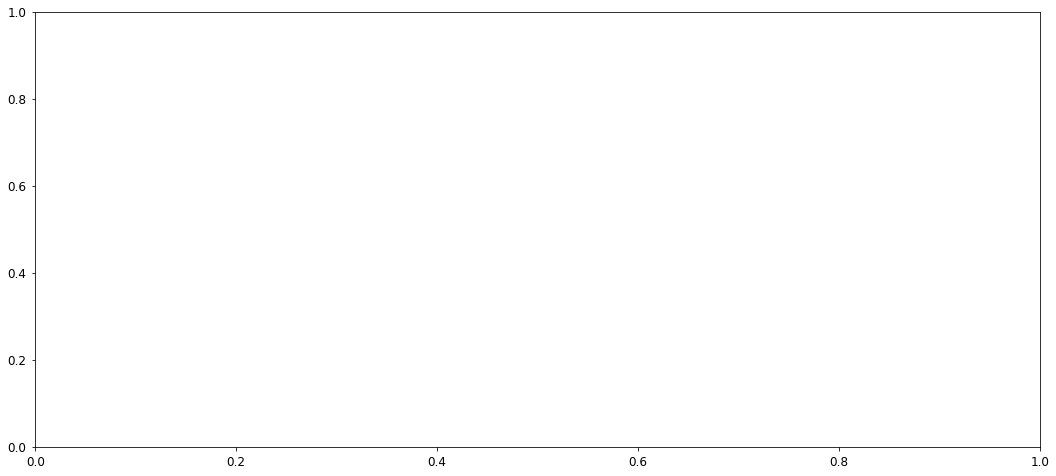

In [17]:
plt.figure(figsize=(18,8))
sns.set_context('paper',font_scale=1.5)
g = sns.boxplot(scores_overall.iloc[:,4:])
g = plt.xticks(rotation=75)
g = plt.ylim(-0.5,4.0)

In [18]:
#plot motor scores over time
mot_tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
                     'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
                    'Typing on a computer keyboard overall score (Q92)',
                    'Taking a glass of water and drinking overall score (Q112)']

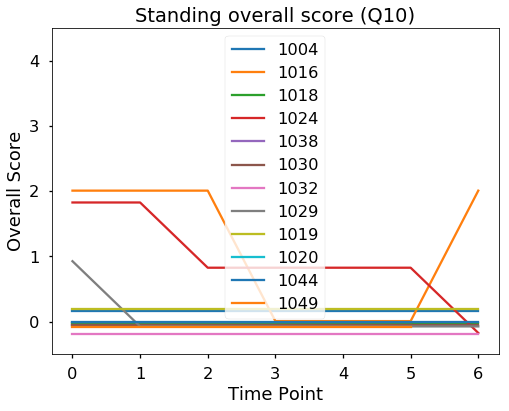

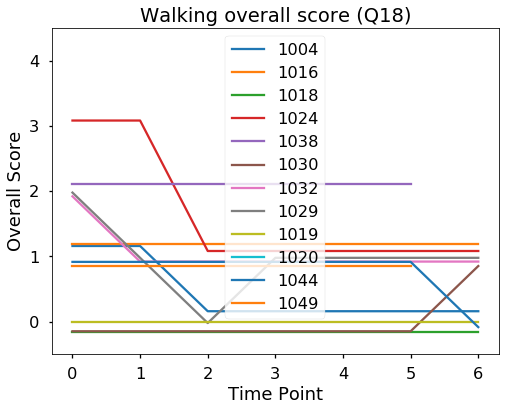

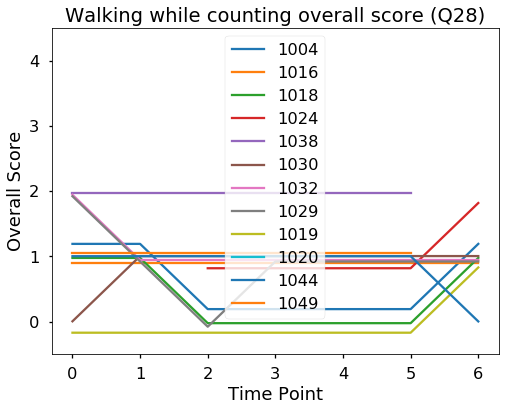

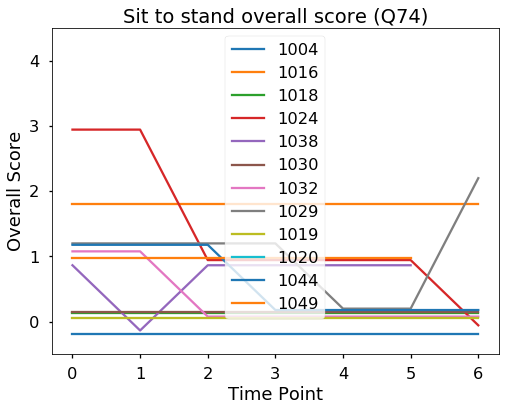

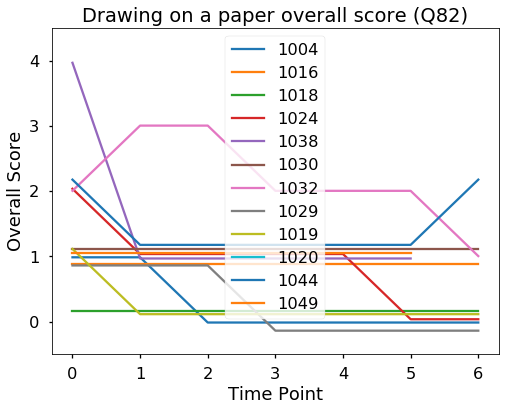

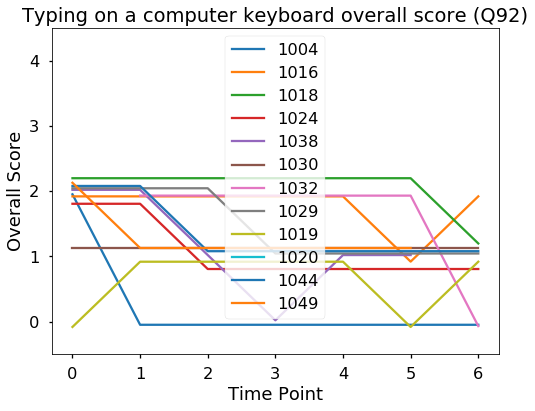

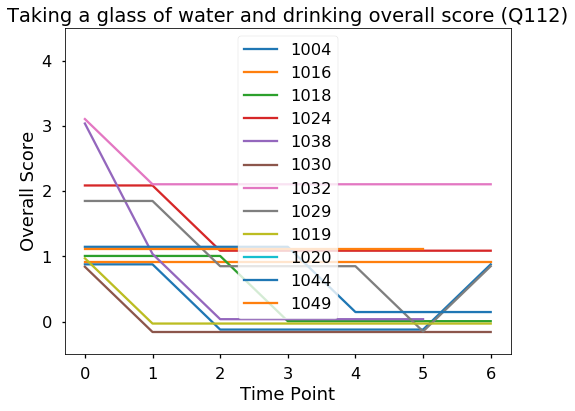

In [19]:
sns.set_context('talk',font_scale=1.25)
for t in mot_tests:
    plt.figure(figsize=(8,6))
    for s in scores_overall['Subject'].unique():
        plt.plot(scores_overall.loc[scores_overall['Subject']==s,t].values+np.random.uniform(-0.2,0.2))
        plt.legend(scores_overall['Subject'].unique())

    plt.xlabel('Time Point')
    plt.ylabel('Overall Score')
    plt.title(t)
    plt.ylim(-0.5,4.5)

Questions: 
* The score for some patients remains constant. Does it mean they are always 'ON'? Are they non-fluctuators?
* Can we assume 0 as Healthy - and measure being On or Off relative to that?
* One person moved from 0 to 1 (1030) on walking on counting after taking the medicine - Subjectivity of the scores?

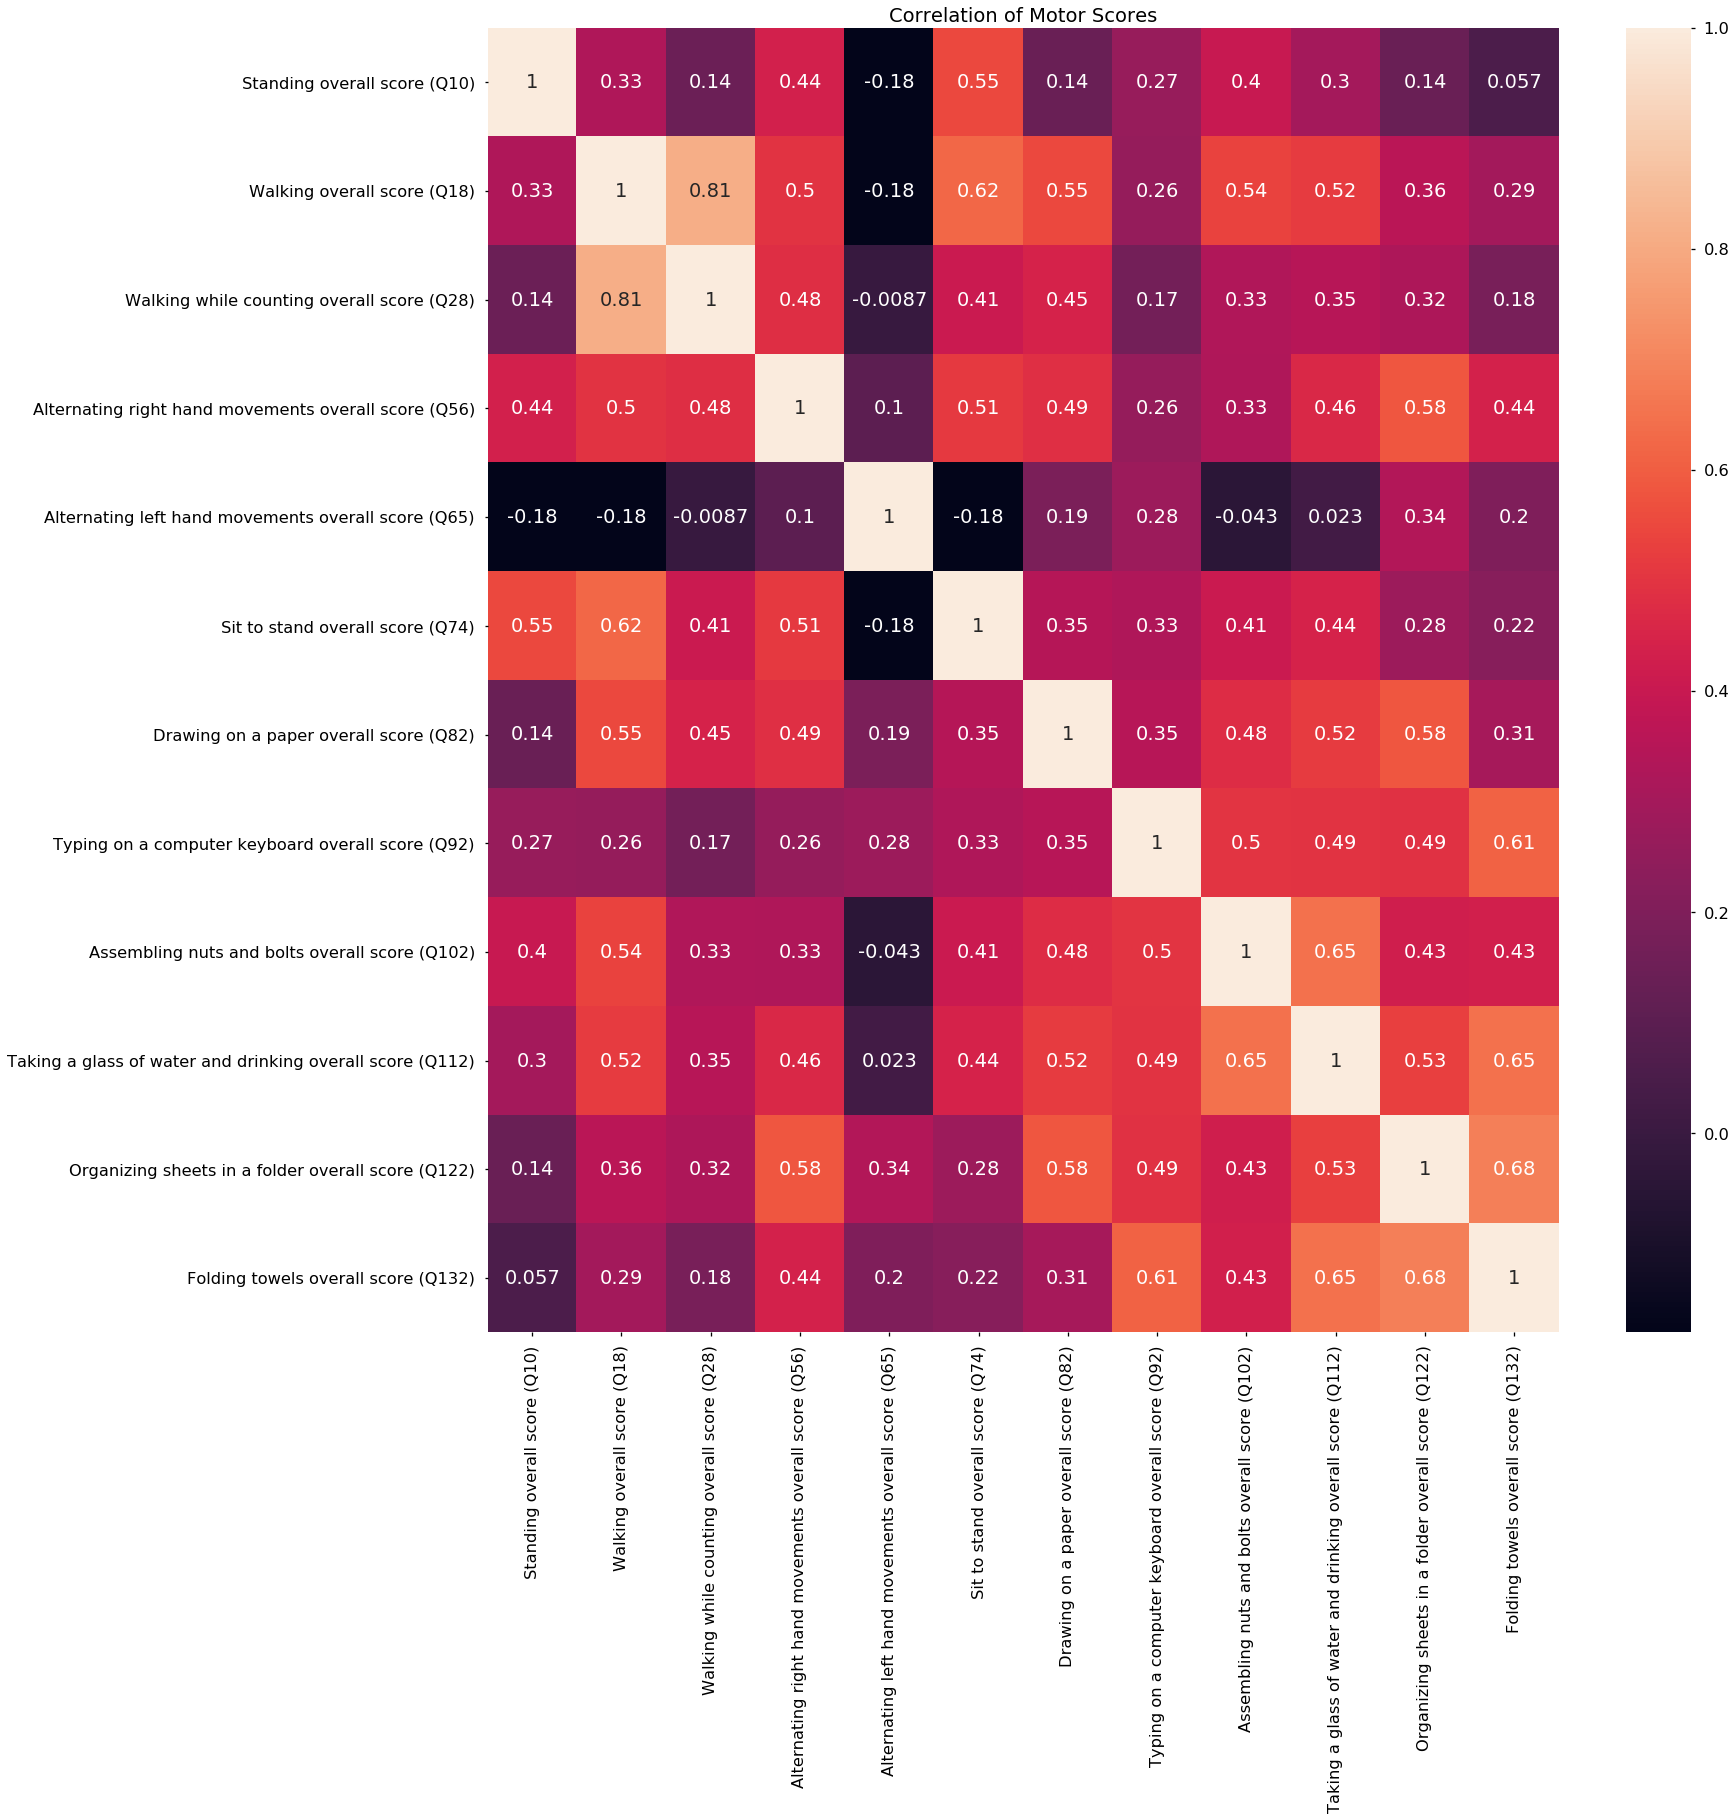

In [34]:
#correlation of scores
plt.figure(figsize=(24,24))
sns.heatmap(scores_overall.iloc[:,4:-1].corr(method='spearman'),annot=True)
plt.title('Correlation of Motor Scores')

In [21]:
#select common subjects and only 1st 2 tests (off and on) to match with UPDRS
s1 = set(scores.Subject.unique())
s2 = set(updrs.Subject.unique())
subj = s1&s2
mot_scores = scores_overall[scores_overall['Subject'].isin(list(subj))]
mot_scores = mot_scores[(mot_scores['Visit']=='2 Weeks: Time 0') | (mot_scores['Visit']=='2 Weeks: Time 60') ]
mot_scores = mot_scores.sort_values('Subject')
updrs = updrs[updrs['Subject'].isin(list(subj))]

In [22]:
#correlation of ADLs motor scores and UPDRS scores
updrs_tests = ['3.4 Finger Tapping - Right Hand (Q40)','3.4 Finger Tapping - Left Hand (Q41)',
               '3.5 Hand Movements - Right Hand (Q42)','3.5 Hand Movements - Left Hand (Q43)',
               '3.6 Pronation-Supination Movements of Hands - Right Hand (Q44)',
               '3.6 Pronation-Supination Movements of Hands - Left Hand (Q45)',
               '3.7 Toe Tapping - Right Foot (Q46)','3.7 Toe Tapping - Left Foot (Q47)',
            '3.8 Leg Agility - Right Leg (Q48)','3.8 Leg Agility - Left Leg (Q49)','3.9 Arising From Chair (Q50)',
              '3.10 Gait (Q51)','3.11 Freezing of Gait (Q52)','3.12 Postural Stability (Q53)',
              '3.13 Posture (Q54)','3.15 Postural Tremor of the Hands - Right Hand (Q56)',
              '3.15 Postural Tremor of the Hands - Left Hand (Q57)',
               '3.16 Kinetic Tremor of the Hands - Right Hand (Q58)',
              '3.16 Kinetic Tremor of the Hands - Left Hand (Q59)',
               '3.17 Rest Tremor Amplitude - Right Upper Extremity (Q60)','3.17 Rest Tremor Amplitude - Left Upper Extremity (Q61)',
               '3.17 Rest Tremor Amplitude - Right Lower Extremity (Q62)','3.17 Rest Tremor Amplitude - Right Lower Extremity (Q62)',
               '3.17 Rest Tremor Amplitude - Left Lower Extremity (Q63)','3.18 Constancy of Rest Tremor (Q65)',               
              ]

In [23]:
mot_tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
                     'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
                    'Typing on a computer keyboard overall score (Q92)',
                    'Taking a glass of water and drinking overall score (Q112)']

In [24]:
updrs = updrs.sort_values('Subject')

In [25]:
mot_scores.index = updrs.index

ValueError: Length mismatch: Expected axis has 20 elements, new values have 22 elements

In [26]:
mot_scores.iloc[:,4:-1][mot_tests]

,Standing overall score (Q10),Walking overall score (Q18),Walking while counting overall score (Q28),Sit to stand overall score (Q74),Drawing on a paper overall score (Q82),Typing on a computer keyboard overall score (Q92),Taking a glass of water and drinking overall score (Q112)
0,0,1,1.0,0,1,2.0,1
2,0,0,0.0,0,0,0.0,0
6,2,1,1.0,2,1,2.0,1
8,2,1,1.0,2,1,2.0,1
13,0,0,1.0,0,0,2.0,1
15,0,0,0.0,0,0,2.0,1
45,0,0,0.0,0,1,0.0,1
47,0,0,0.0,0,0,1.0,0
19,2,3,NaN,3,2,2.0,2
21,1,1,1.0,1,1,1.0,1


In [27]:
mot_updrs_scores = pd.concat([mot_scores.iloc[:,4:-1][mot_tests],updrs[updrs_tests]],axis=1)

In [28]:
mot_updrs_scores[['Walking overall score (Q18)','3.10 Gait (Q51)']]

,Walking overall score (Q18),3.10 Gait (Q51)
0,1.0,1.0
1,NaN,0.0
2,0.0,1.0
3,NaN,1.0
4,NaN,0.0
5,NaN,0.0
6,1.0,1.0
7,NaN,1.0
8,1.0,0.0
9,NaN,0.0


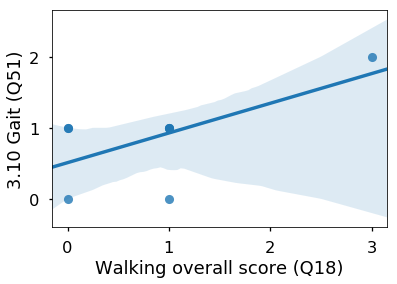

In [29]:
sns.regplot(x='Walking overall score (Q18)',y='3.10 Gait (Q51)',data=mot_updrs_scores)

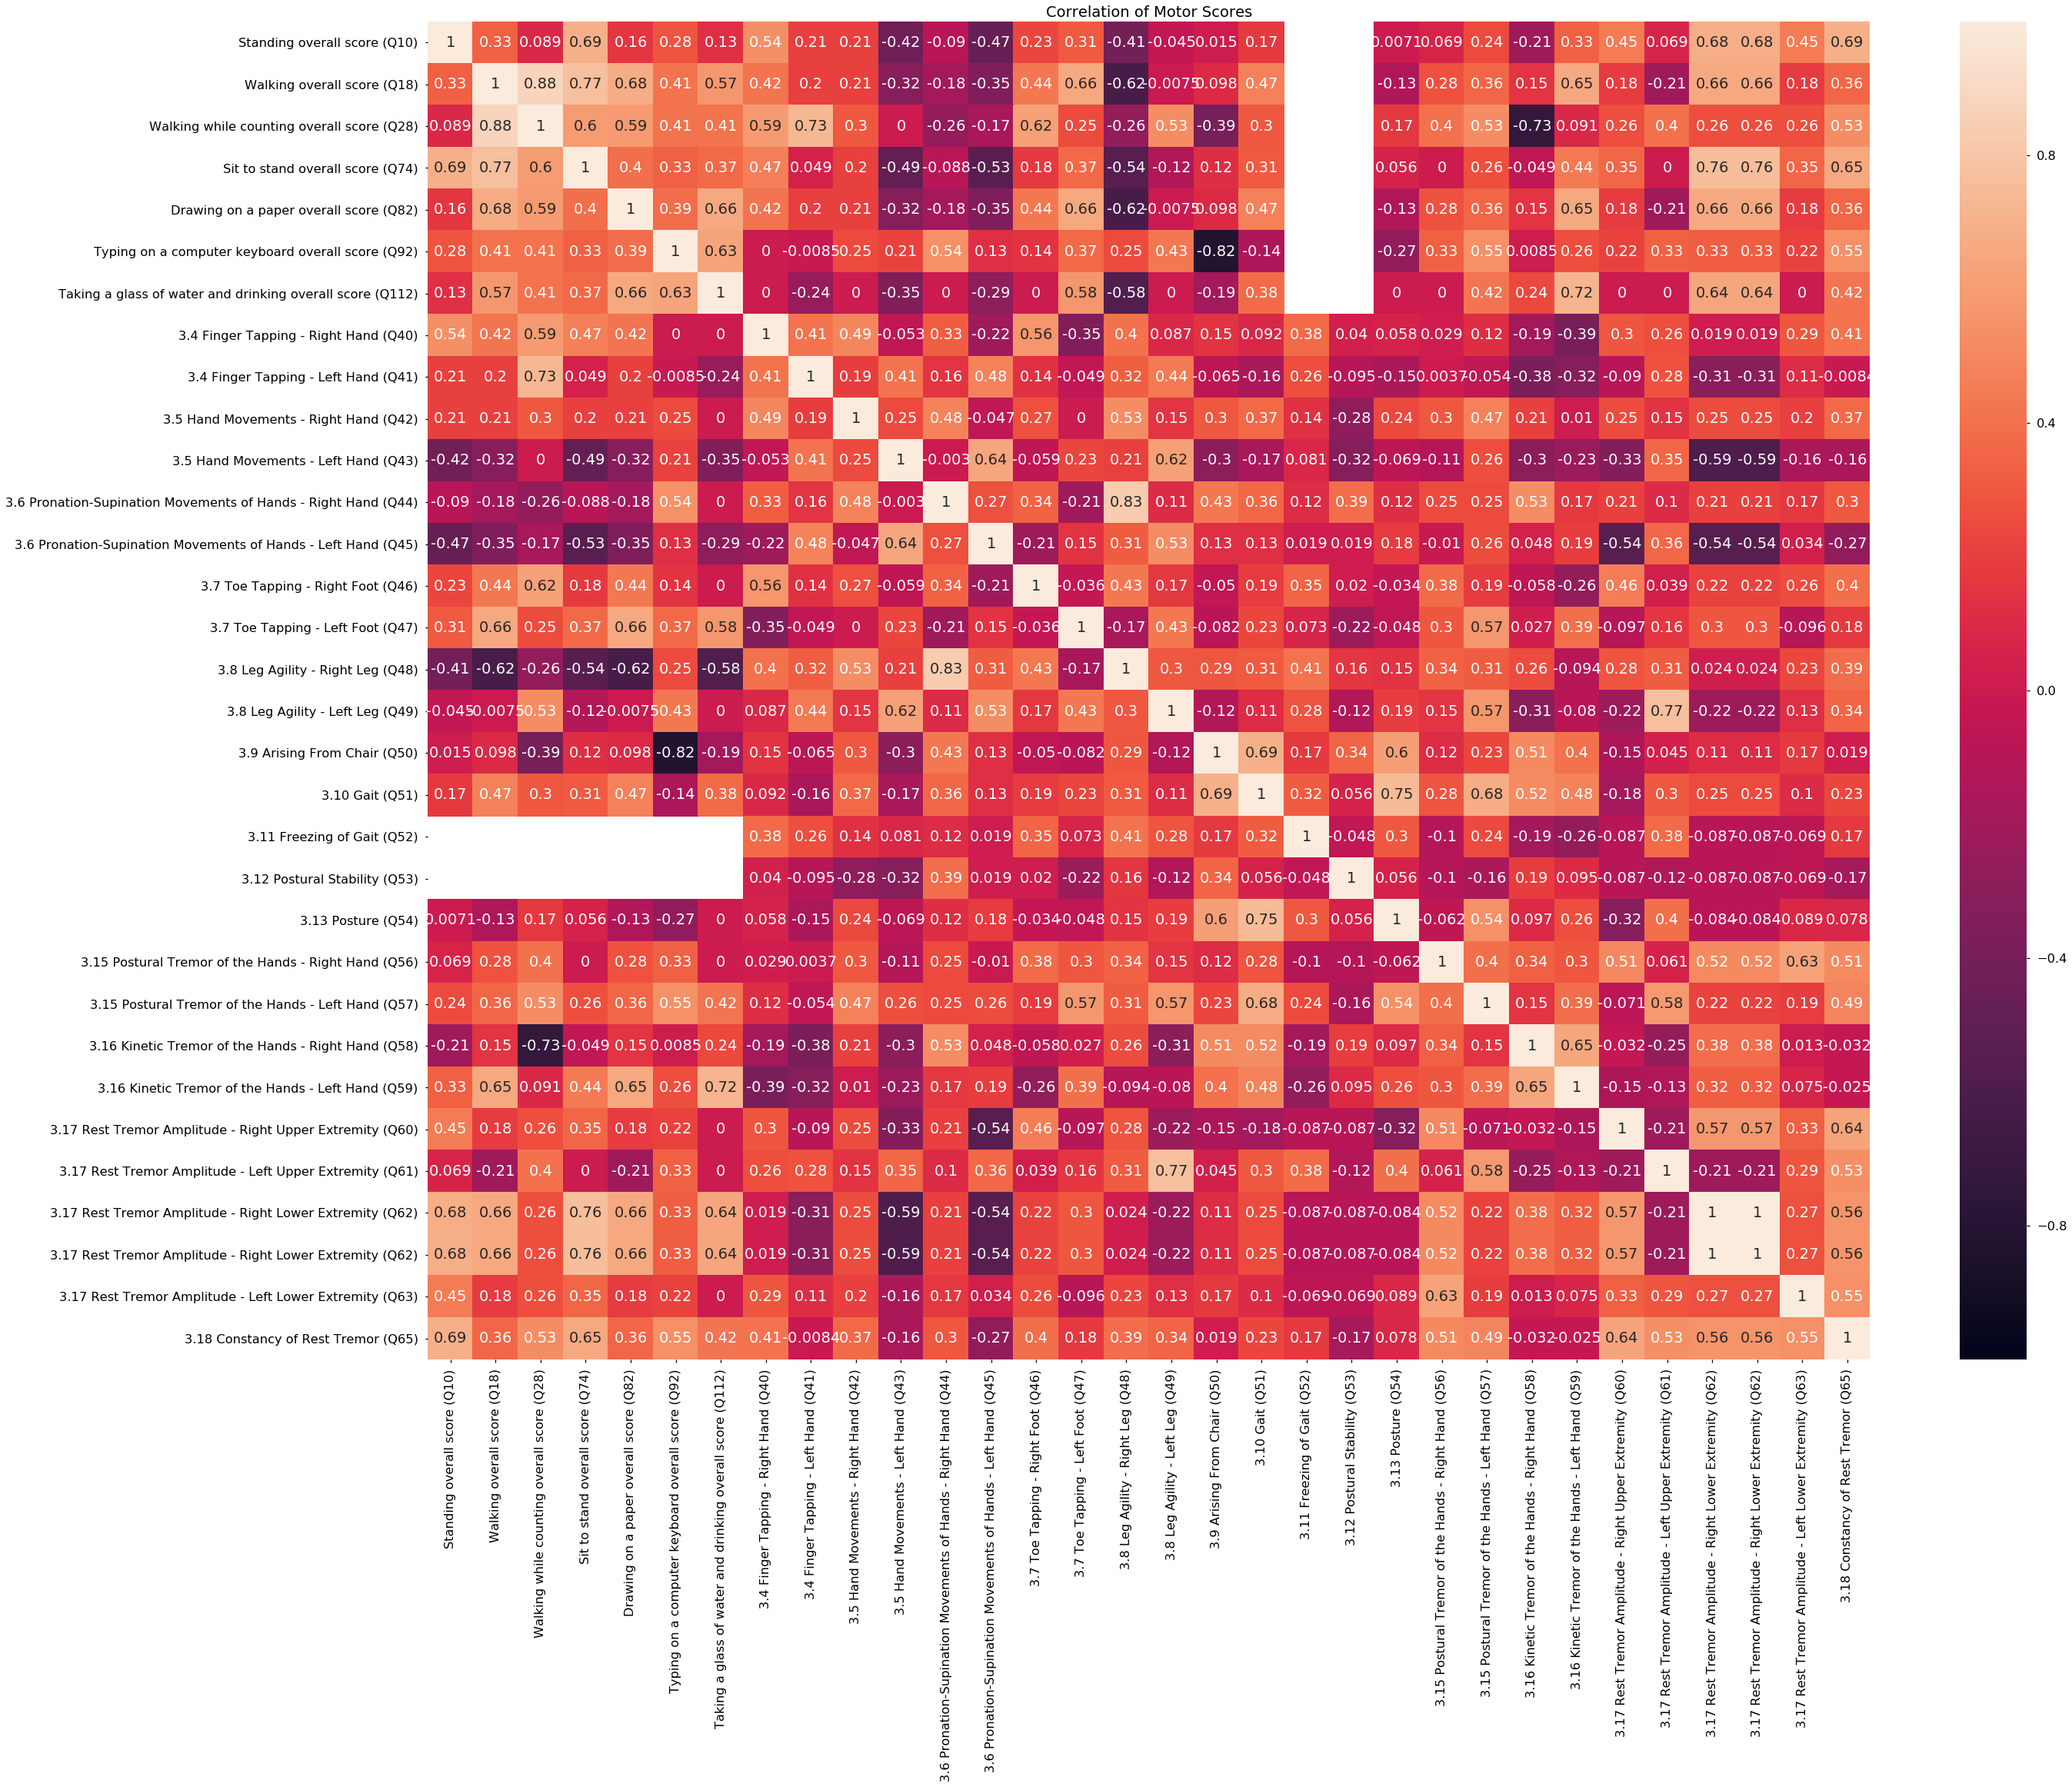

In [35]:
#correlation of scores
plt.figure(figsize=(42,32))
sns.heatmap(mot_updrs_scores.corr(method='spearman'),annot=True,vmin=-1,vmax=1)
plt.title('Correlation of Motor Scores')

* Right hand pronation-supination (Q44) highly correlated with right leg agility
* Gait (Q51) correlated with Posture (54), Postural tremor of Left Hand (57) and Kinetic tremor of both hands (58.59)